# k-means clustering

k-means clustering is a form of 'unsupervised learning'. This is useful for grouping unlabelled data. For example, in the Wisconsin breast cancer data set, what if we did did not know whether the patients had cancer or not at the time the data was collected? Could we find a way of finding groups of similar patients? These groups may then form the basis of some further investigation. 

k-means clustering groups data in such a way that the average distance of all points to their closest cluster centre is minimised. 

Let's start by importing the required modules, and loading our data. In order better visualise what k-means is doing we will limit our data to two features (though k-means clustering works with any number of features).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
  
# Load data
from sklearn import datasets
data_set = datasets.load_breast_cancer()
X=data_set.data[:,0:2] #  restrict patient data to two features.

We will normalise our data:

In [2]:
sc=StandardScaler() 
sc.fit(X)
X_std=sc.transform(X)

And now we will group patients into three clusters (k=3), and plot the centre of each cluster (each cluster centre has two co-ordinates, representing the normalised features we are using). If we used data with more than two features we would have a co-ordinate point for each feature.

In [8]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X_std)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[-0.50925763 -0.735464  ]
 [ 1.52872048  0.58192245]
 [-0.29368671  0.91478648]]


We can identify which cluster a sample has been put into with 'kmeans.labels_'. Using that we may plot our clustering:

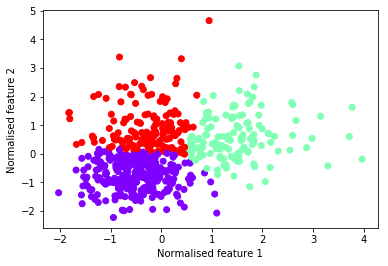

In [9]:
labels = kmeans.labels_

plt.scatter(X_std[:,0],X_std[:,1],
            c=labels, cmap=plt.cm.rainbow)
plt.xlabel('Normalised feature 1')
plt.ylabel('Normalised feature 2')
plt.show() 

## How many clusters should be used?

Sometimes we may have prior knowledge that we want to group the data into a given number of clusters. Other times we may wish to investigate what may be a good number of clusters.

In the example below we look at changing the number of clusters between 1 and 100 and measure the average distance points are from their closest cluster centre (kmeans.transform gives us the distance for each sample to each cluster centre). Looking at the results we may decide that up to about 10 clusters may be useful, but after that there are diminishing returns of adding further clusters.

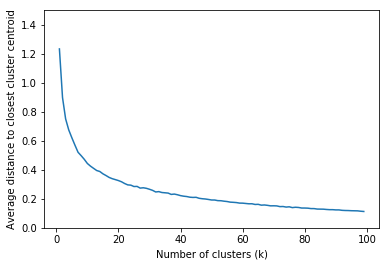

In [5]:
distance_to_closter_cluster_centre = []
for k in range(1,100):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(X_std)
    distance = np.min(kmeans.transform(X_std),axis=1)
    average_distance = np.mean(distance)
    distance_to_closter_cluster_centre.append(average_distance)

clusters = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distance to closest cluster centroid')
plt.ylim(0,1.5)
plt.show()